# Лабораторная работа №2. Нечеткая логика

Необходимо разработать программу на языке python, которая реализует предложенное вариантом задание. Предметную область можно выбрать из предложенного списка, либо выбрать свою.

## Варианты заданий

16.	На языке Python разработайте скрипт, позволяющий выполнить операцию объединения заданных пользователем нечетких множеств с трапециевидными функциями принадлежности. Входными данными будут параметры функций принадлежности и четкие объекты для каждого из множеств. Выходными – объединение данных нечетких множеств.

### 16. **Управление зданиями**
   - Температура в помещении: холодно, комфортно, жарко
   - Влажность в помещении: сухо, комфортно, влажно

## Контрольные вопросы по лабораторной работе:

1.	Дайте определение нечеткому множеству.
2.	Какие способы задания функций принадлежности вы знаете?
3.	Какую операцию вы реализовали в своей лабораторной работе?

## Ссылки
1. В.В.Воронина. Методы искусственного интеллекта и машинное обучение. Методические указания. 

Температура = 23.0
Влажность = 38.0

Степени принадлежности температуры:
     cold: 0.00
  comfort: 1.00
      hot: 0.00

Степени принадлежности влажности:
      dry: 0.13
  comfort: 0.30
    humid: 0.00

--- Результат ---
Коэффициент комфорта 1.00


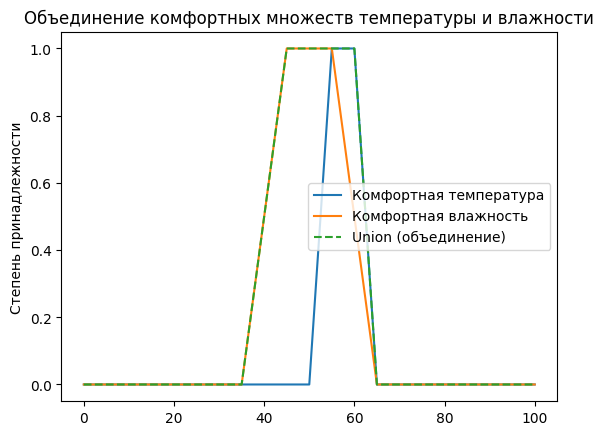

In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

def main():
    temperature = np.linspace(0, 40, 41)
    humidity = np.linspace(0, 100, 101)

    temperature_cold = fuzz.trapmf(temperature, [0, 6, 12, 18])
    temperature_comfort = fuzz.trapmf(temperature, [20, 22, 24, 26])
    temperature_hot = fuzz.trapmf(temperature, [26, 28, 40, 40])

    humidity_dry = fuzz.trapmf(humidity, [0, 15, 25, 40])
    humidity_comfort = fuzz.trapmf(humidity, [35, 45, 55, 65])
    humidity_humid = fuzz.trapmf(humidity, [60, 75, 100, 100])

    temp_inp = float(input("Введите температуру в помещении (0–40°C): "))
    humid_inp = float(input("Введите влажность в помещении (0–100%): "))
    print(f"Температура = {temp_inp}")
    print(f"Влажность = {humid_inp}")

    temp_interp = {
        "cold": fuzz.interp_membership(temperature, temperature_cold, temp_inp),
        "comfort": fuzz.interp_membership(temperature, temperature_comfort, temp_inp),
        "hot": fuzz.interp_membership(temperature, temperature_hot, temp_inp)
    }

    humid_interp = {
        "dry": fuzz.interp_membership(humidity, humidity_dry, humid_inp),
        "comfort": fuzz.interp_membership(humidity, humidity_comfort, humid_inp),
        "humid": fuzz.interp_membership(humidity, humidity_humid, humid_inp)
    }

    print("\nСтепени принадлежности температуры:")
    for k, v in temp_interp.items():
        print(f"  {k:>7}: {v:.2f}")
    print("\nСтепени принадлежности влажности:")
    for k, v in humid_interp.items():
        print(f"  {k:>7}: {v:.2f}")

    x_union = np.linspace(0, 100, 101)

    # масштабируем температуру с диапазона [0,40] -> [0,100]
    temperature_scaled = temperature * (100 / 40)

    # интерполируем функции принадлежности на общую шкалу
    temp_comf_interp = np.interp(x_union, temperature_scaled, temperature_comfort)
    hum_comf_interp = np.interp(x_union, humidity, humidity_comfort)

    # объединяем множества
    union_comf = np.fmax(temp_comf_interp, hum_comf_interp)

    # вычисляем фактическую степень "комфортности" для введённых значений
    result = np.fmax(temp_interp["comfort"], humid_interp["comfort"])

    print("\n--- Результат ---")
    print(f"Коэффициент комфорта {result:.2f}")

    plt.plot(x_union, temp_comf_interp, label="Комфортная температура")
    plt.plot(x_union, hum_comf_interp, label="Комфортная влажность")
    plt.plot(x_union, union_comf, label="Union (объединение)", linestyle="--")
    plt.legend()
    plt.title("Объединение комфортных множеств температуры и влажности")
    plt.ylabel("Степень принадлежности")
    plt.show()

main()